In [46]:

# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.tree import plot_tree
from sklearn import tree
from matplotlib.colors import LinearSegmentedColormap

In [47]:
df = pd.read_csv("dreaddit_train (1).csv") # Load the CSV dataset
df.head()

,post,question,label
0,"Post: He said he had not felt that way before,...","Question: The answer to the question ""Does th...",yes
1,"Post: Hey there r/assistance, Not sure if this...","Question: The answer to the question ""Does th...",no
2,Post: My mom then hit me with the newspaper an...,"Question: The answer to the question ""Does th...",yes
3,"Post: until i met my new boyfriend, he is amaz...","Question: The answer to the question ""Does th...",yes
4,Post: October is Domestic Violence Awareness M...,"Question: The answer to the question ""Does th...",yes


In [48]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   post      2837 non-null   object
 1   question  2837 non-null   object
 2   label     2837 non-null   object
dtypes: object(3)
memory usage: 66.6+ KB


In [4]:
df.columns

Index(['post', 'question', 'label'], dtype='object')

In [5]:
df.shape

(2837, 3)

In [49]:
# Features and Labels
X = df["post"]  # Text data
y = df["label"]  # Target labels 

In [7]:
X.head() # Display the first 5 text posts from the feature column

0    Post: He said he had not felt that way before,...
1    Post: Hey there r/assistance, Not sure if this...
2    Post: My mom then hit me with the newspaper an...
3    Post: until i met my new boyfriend, he is amaz...
4    Post: October is Domestic Violence Awareness M...
Name: post, dtype: object

In [8]:
y.head() # Display the first 5 labels from the target column

0    yes
1     no
2    yes
3    yes
4    yes
Name: label, dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) # Split the dataset into training and testing sets
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 2269
Testing samples: 568


In [52]:
#Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(
    max_features=20000, # Limit features to most important words
    ngram_range=(1, 2), # Unigrams + bigrams
    stop_words="english", # Remove common stop words
    min_df=2, # Ignore words appearing less than 2 times
    max_df=0.9 # Ignore very common words
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [53]:

# Feature Scaling

scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled = scaler.transform(X_test_vec)

In [54]:
# Logistic Regression
lr = LogisticRegression(
    max_iter=2000,
    C=1.5,
    penalty="l2",
    solver="liblinear",
    random_state=42
)

lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

print("\nLogistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.6830985915492958
              precision    recall  f1-score   support

          no       0.67      0.66      0.67       270
         yes       0.70      0.70      0.70       298

    accuracy                           0.68       568
   macro avg       0.68      0.68      0.68       568
weighted avg       0.68      0.68      0.68       568



In [55]:
# Support Vector Machine (SVM)

svm = LinearSVC(
    C=1.5,
    max_iter=3000,
    random_state=42
)

svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

print("\nSVM Accuracy:",
      accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.6813380281690141
              precision    recall  f1-score   support

          no       0.66      0.67      0.67       270
         yes       0.70      0.69      0.69       298

    accuracy                           0.68       568
   macro avg       0.68      0.68      0.68       568
weighted avg       0.68      0.68      0.68       568



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
# Random Forest Model

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=1,
    random_state=42,
    oob_score=True
)

rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

print("\nRandom Forest Accuracy:",
      accuracy_score(y_test, rf_pred))
print("Random Forest OOB Score:", rf.oob_score_)
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.6866197183098591
Random Forest OOB Score: 0.7219039224327898
              precision    recall  f1-score   support

          no       0.69      0.62      0.65       270
         yes       0.68      0.75      0.71       298

    accuracy                           0.69       568
   macro avg       0.69      0.68      0.68       568
weighted avg       0.69      0.69      0.69       568



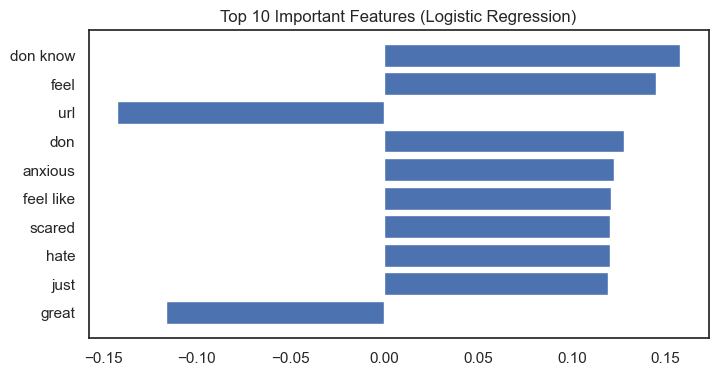

In [57]:
# Feature Importance (Logistic Regression)

feature_weights = lr.coef_[0]
top_indices = np.argsort(np.abs(feature_weights))[-10:]

top_features_lr = np.array(
    vectorizer.get_feature_names_out()
)[top_indices]

top_weights_lr = feature_weights[top_indices]

plt.figure(figsize=(8, 4))
plt.barh(top_features_lr, top_weights_lr)
plt.title("Top 10 Important Features (Logistic Regression)")
plt.show()

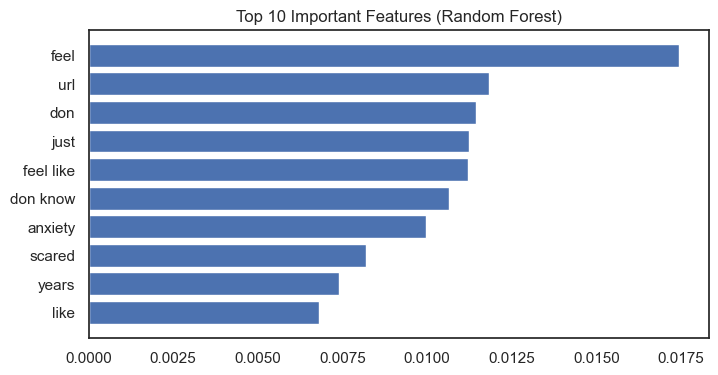

In [58]:
# Feature Importance (Random Forest)

rf_importance = rf.feature_importances_
top_rf_idx = np.argsort(rf_importance)[-10:]

top_features_rf = np.array(
    vectorizer.get_feature_names_out()
)[top_rf_idx]

top_weights_rf = rf_importance[top_rf_idx]

plt.figure(figsize=(8, 4))
plt.barh(top_features_rf, top_weights_rf)
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

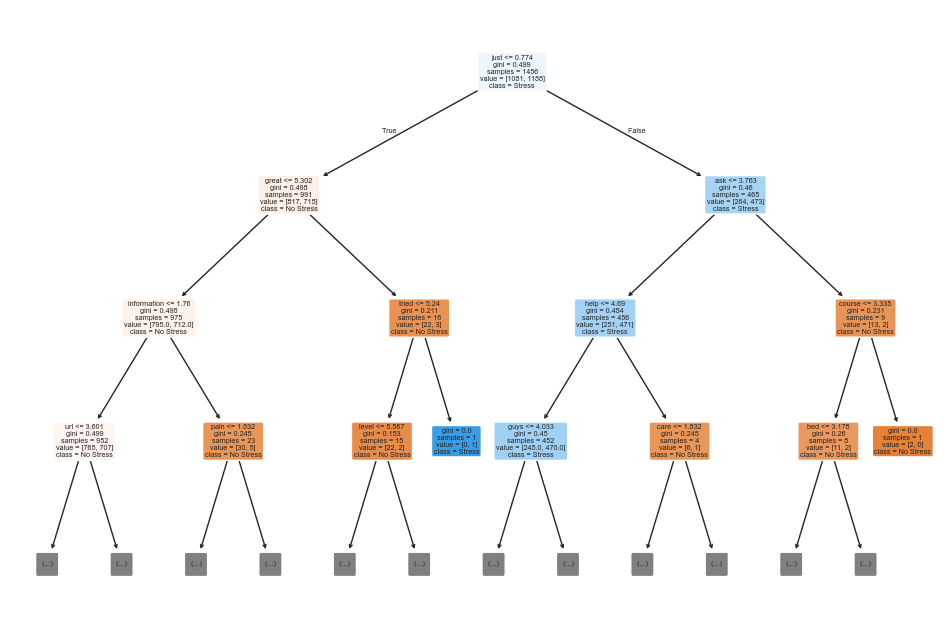

In [59]:
#  Decision Tree Visualization

plt.figure(figsize=(12, 8))
tree.plot_tree(
    rf.estimators_[0],
    max_depth=3,
    feature_names=vectorizer.get_feature_names_out(),
    class_names=["No Stress", "Stress"],
    filled=True,
    rounded=True
)
plt.show()

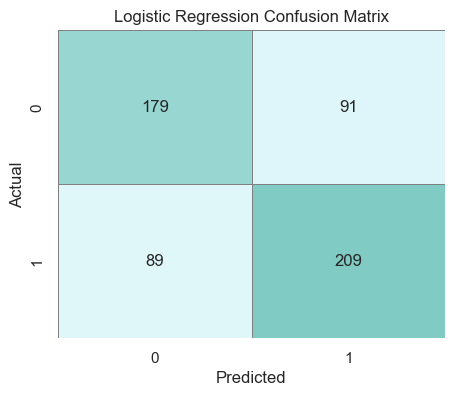

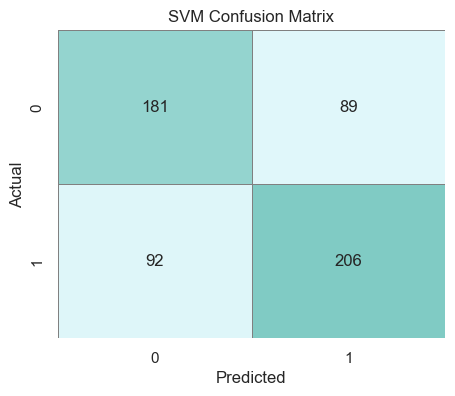

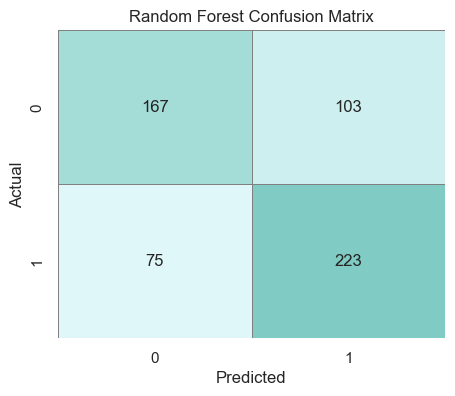

In [60]:
#Confusion Matrix Function
light_cmap = LinearSegmentedColormap.from_list("light_colors", ["#e0f7fa", "#80cbc4"])

def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.set(style="white")
    sns.heatmap(cm, annot=True, fmt="d", cmap=light_cmap, cbar=False, linewidths=0.5, linecolor='gray')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

#Plot for all the models
plot_confusion(y_test, lr_pred, "Logistic Regression")
plot_confusion(y_test, svm_pred, "SVM")
plot_confusion(y_test, rf_pred, "Random Forest")

C:\Users\prash\AppData\Local\Temp\ipykernel_38032\3819690386.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_values, palette=pink_colors)


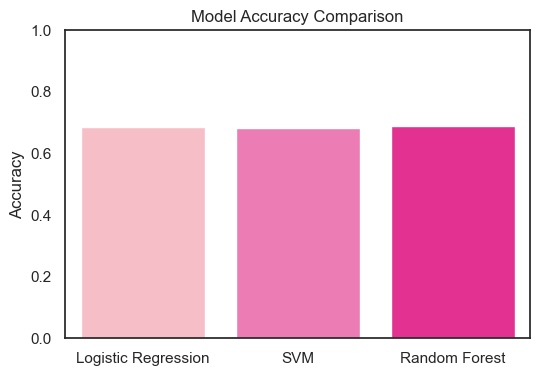

In [61]:
#  Accuracy Comparison
accuracy_values = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred)
]
models = ["Logistic Regression", "SVM", "Random Forest"]

plt.figure(figsize=(6,4))

# Use custom pink colors
pink_colors = ["#ffb6c1", "#ff69b4", "#ff1493"]  # light to dark pink
sns.barplot(x=models, y=accuracy_values, palette=pink_colors)

plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.show()

C:\Users\prash\AppData\Local\Temp\ipykernel_38032\2524173667.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=precision_values, palette=["#add8e6", "#6495ed", "#0000ff"])


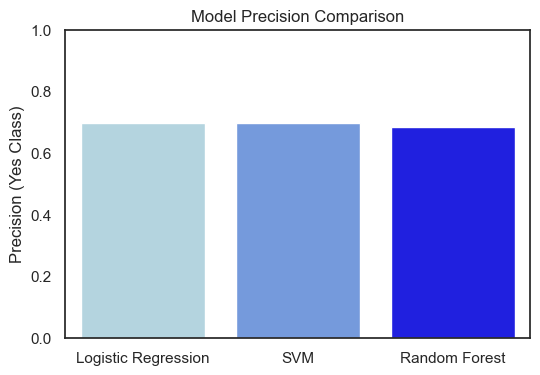

In [62]:
#  precision comparison

precision_values = [precision_score(y_test, lr_pred, pos_label="yes"),
                    precision_score(y_test, svm_pred, pos_label="yes"),
                    precision_score(y_test, rf_pred, pos_label="yes")]

models = ["Logistic Regression", "SVM", "Random Forest"]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=precision_values, palette=["#add8e6", "#6495ed", "#0000ff"])
plt.ylabel("Precision (Yes Class)")
plt.ylim(0,1)
plt.title("Model Precision Comparison")
plt.show()

In [63]:
#Sample Prediction
sample_post = ["I am feeling very anxious about my exam tomorrow"]
sample_tfidf = vectorizer.transform(sample_post)
sample_scaled = scaler.transform(sample_tfidf)

print("Logistic Regression Prediction:", lr.predict(sample_scaled))
print("SVM Prediction:", svm.predict(sample_scaled))
print("Random Forest Prediction:", rf.predict(sample_scaled))

Logistic Regression Prediction: ['yes']
SVM Prediction: ['yes']
Random Forest Prediction: ['yes']


In [36]:
sample_text = ["I feel extremely stressed and anxious about my exams"]
sample_vec = vectorizer.transform(sample_text)
sample_scaled = scaler.transform(sample_vec)
prediction = lr.predict(sample_scaled)
print("Input Text:", sample_text[0])
print("Stress Detected:", "Yes" if prediction[0] == 1 else "No")

Input Text: I feel extremely stressed and anxious about my exams
Stress Detected: No


In [65]:
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Logistic Regression Accuracy: {:.2f}%".format(lr_accuracy*100))
print("SVM Accuracy: {:.2f}%".format(svm_accuracy*100))
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy*100))

Logistic Regression Accuracy: 68.31%
SVM Accuracy: 68.13%
Random Forest Accuracy: 68.66%
